In [1]:
s = poly(0, 's', 'r')
h = 1

 s  = 
  s
 h  = 
   1.


In [2]:
Tkr = 12.8
Kkr = 1.18
Ti = Tkr / 2
Td = Ti / 4
Tc = Td / 8
T0 = 1.17
n = 6
w1 = (1 + 1 / (Ti*s) + Td * s / (1 + Tc * s)) * (Kkr * 0.6) * (2/(1 + T0 * s)^n)
w = w1 / (1 + w1)

 Tkr  = 
   12.8
 Kkr  = 
   1.18
 Ti  = 
   6.4
 Td  = 
   1.6
 Tc  = 
   0.2
 T0  = 
   1.17
 n  = 
   6.
 w1  = 
                                     1.416 +9.3456s +16.31232s^2                                    
   -----------------------------------------------------------------------------------------------  
   6.4s +46.208s^2 +140.4s^3 +231.28934s^4 +220.89446s^5 +120.16864s^6 +33.255052s^7 +3.2834102s^8  
 w  = 
                                         0.4312602 +2.8463167s +4.968103s^2                                        
   --------------------------------------------------------------------------------------------------------------  
   0.4312601 +4.7955161s +19.041311s^2 +42.760494s^3 +70.441889s^4 +67.275978s^5 +36.598744s^6 +10.128207s^7 +s^8  


In [3]:
numer = coeff(w.num)
denom = coeff(w.den)
denom = denom(1:length(denom) - 1);
numer = [numer zeros(1, length(denom) - length(numer))]

 numer  = 
   0.4312602   2.8463167   4.968103
 denom  = 
   0.4312601   4.7955161   19.041311   42.760494   70.441889   67.275978   36.598744   10.128207   1.
 numer  = 
   0.4312602   2.8463167   4.968103   0.   0.   0.   0.   0.


## h

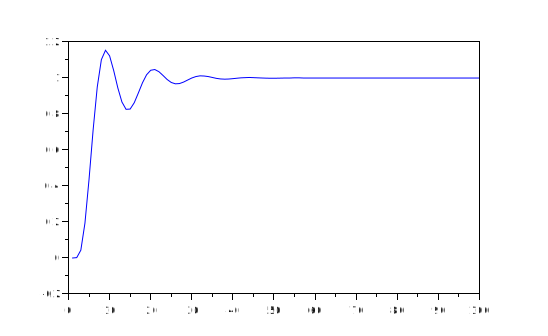

In [9]:
hh = [
  -4.106E-10
   2.098E-03
   4.335E-02
   1.936E-01
   4.376E-01
   7.136E-01
   9.507E-01
   1.102E+00
   1.154E+00
   1.123E+00
   1.041E+00
   9.451E-01
   8.666E-01
   8.261E-01
   8.274E-01
   8.628E-01
   9.171E-01
   9.735E-01
   1.018E+00
   1.043E+00
   1.047E+00
   1.035E+00
   1.014E+00
   9.917E-01
   9.752E-01
   9.677E-01
   9.691E-01
   9.774E-01
   9.888E-01
   1.000E+00
   1.008E+00
   1.012E+00
   1.011E+00
   1.008E+00
   1.003E+00
   9.979E-01
   9.947E-01
   9.935E-01
   9.943E-01
   9.964E-01
   9.988E-01
   1.001E+00
   1.002E+00
   1.003E+00
   1.002E+00
   1.001E+00
   1.000E+00
   9.992E-01
   9.987E-01
   9.986E-01
   9.990E-01
   9.995E-01
   1.000E+00
   1.000E+00
   1.001E+00
   1.001E+00
   1.000E+00
   1.000E+00
   9.999E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.999E-01
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   9.999E-01
   9.999E-01
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   9.998E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.998E-01
   9.998E-01
   9.999E-01
   9.999E-01
   9.999E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.999E-01
   9.999E-01
   1.000E+00
   1.000E+00
];
plot(hh)


## h_a

In [4]:
A1 = [zeros(1, length(denom) - 1); eye(length(denom) - 1, length(denom) - 1)];
A1 = [A1 -denom']
B1 = numer'
C1 = [zeros(1, length(denom) - 1) 1]

 A1  = 
   0.   0.   0.   0.   0.   0.   0.  -0.4312601
   1.   0.   0.   0.   0.   0.   0.  -4.7955161
   0.   1.   0.   0.   0.   0.   0.  -19.041311
   0.   0.   1.   0.   0.   0.   0.  -42.760494
   0.   0.   0.   1.   0.   0.   0.  -70.441889
   0.   0.   0.   0.   1.   0.   0.  -67.275978
   0.   0.   0.   0.   0.   1.   0.  -36.598744
   0.   0.   0.   0.   0.   0.   1.  -10.128207
 B1  = 
   0.4312602
   2.8463167
   4.9681030
   0.
   0.
   0.
   0.
   0.
 C1  = 
   0.   0.   0.   0.   0.   0.   0.   1.


In [14]:
// Ad1 = (A1 * h + eye(A1))
Ad1 = expm(A1*h)
Sh = inv(A1)*(eye(A1)-expm(-A1*h))
Bd1 = Ad1*Sh*B1

 Ad1  = 
   0.9999962  -0.0000265  -0.0001569  -0.0007445  -0.0026147  -0.005552   -0.0013557   0.0212506
   0.9999575   0.999701   -0.0017708  -0.008436   -0.0298191  -0.0643519  -0.0206273   0.2349458
   0.4998281   0.9987855   0.9927753  -0.0346445  -0.1238809  -0.2749558  -0.1242104   0.9176429
   0.1662712   0.497196    0.9832326   0.9189519  -0.2938956  -0.6743769  -0.4093783   1.9828345
   0.0410015   0.1619351   0.4715747   0.8616189   0.4918722  -1.2007602  -0.895819    3.0616813
   0.0076631   0.0368604   0.1374654   0.3554268   0.4537337  -0.3742346  -1.4122499   2.4192386
   0.0009872   0.0054103   0.0235486   0.0742799   0.1335335  -0.0174363  -0.489287    0.3911717
   0.0000616   0.0003637   0.0017264   0.0060629   0.0128739   0.0031436  -0.0492755   0.0097855
 Sh  = 
   0.9999964   0.0000372  -0.0003498   0.0030019  -0.0234573   0.1667441  -1.0810273   6.4427917
  -0.5000401   1.0004104  -0.0038527   0.0330308  -0.2578378   1.8306999  -11.854039   70.561381
   0.1665098 

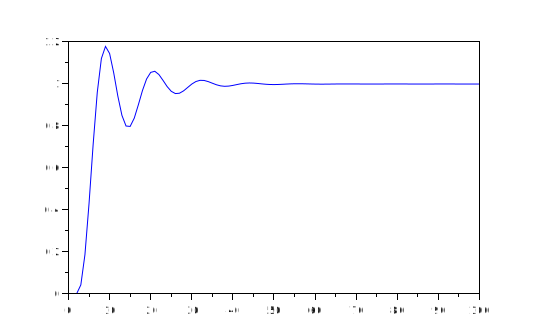

In [15]:
hd1 = [];
// adk1 = eye(Ad1);
// for k=1:100 
//     hd1 = [hd1; C1 * adk1 * B1];
//     adk1 = adk1 * Ad1;
// end;
v = zeros(Bd1);
for k=1:100
    hd1 = [hd1; C1 * v];
    v = Ad1 * v + Bd1;
end;
plot(hd1)

## h_d

In [7]:
sys = syslin('c', w);
sysd = dscr(sys, h);
Ad2 = sysd.A
Bd2 = sysd.B
Cd2 = sysd.C

 Ad2  = 
   1.1883623   0.3926953  -0.1424494  -0.077401   -0.0519219  -0.0301443  -0.0001962   0.0000007
  -0.0977944   1.1142565  -0.7855073  -0.5975829  -0.4875575  -0.3148516  -0.0027345   0.0000128
   0.2390588   0.3848111   0.6101854   0.9833246   1.1225816   0.855421    0.0120601  -0.0000759
   0.2664139   0.3536795  -0.6305251  -0.3814657  -0.0713523   0.1009328   0.0122043  -0.0001283
   0.0244242   0.0535984  -0.1107407  -0.3529588  -0.489164   -0.3942245   0.0001306  -0.0000607
  -0.0292572  -0.0344011   0.0482565   0.0757506   0.0488852   0.0097867  -0.0016215   0.0000023
   0.031726    0.2533921   0.4421821   0.0502645   0.0213087  -0.0103019   0.7957312  -0.0177361
   0.1603079   0.0812406  -0.1567116  -0.0878028  -0.0489311  -0.0231595   0.2766438   0.7018681
 Bd2  = 
  -0.0178347
  -0.2508505
   1.1246387
   1.1877076
   0.0719422
  -0.1414850
  -0.0631394
   0.0073557
 Cd2  = 
  -0.1113553  -1.735D-17  -3.469D-18   6.505D-19  -9.487D-20   2.541D-21  -1.735D-17  -1.041D

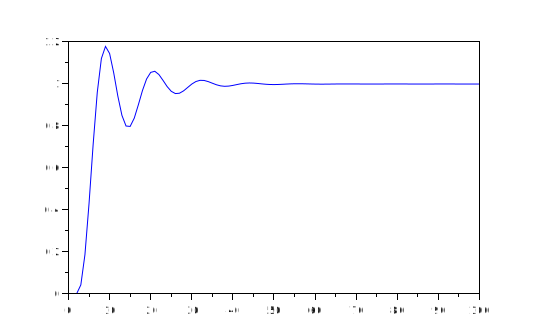

In [8]:
hd2 = [];
// adk2 = eye(Ad2);
// for k=1:100 
//     hd2 = [hd2; C2*adk2*B2];
//     adk2 = adk2 * Ad2;
// end;
v = zeros(Bd2);
for k=1:100
    hd2 = [hd2; Cd2 * v];
    v = Ad2 * v + Bd2;
end;
plot(hd2)

## result

 ans  =
   0.          1.          2.       
  -4.106D-10   0.          0.       
   0.002098    0.001986    0.001986 
   0.04335     0.0433315   0.0433315
   0.1936      0.1874489   0.1874489
   0.4376      0.4316261   0.4316261
   0.7136      0.713283    0.713283 
   0.9507      0.9599918   0.9599918
   1.102       1.1212065   1.1212065
   1.154       1.1788904   1.1788904
   1.123       1.1452291   1.1452291
   1.041       1.0529823   1.0529823
   0.9451      0.9426836   0.9426836
   0.8666      0.8505289   0.8505289
   0.8261      0.7999098   0.7999098
   0.8274      0.7980379   0.7980379
   0.8628      0.8374894   0.8374894
   0.9171      0.901244    0.901244 
   0.9735      0.9691771   0.9691771
   1.018       1.0240071   1.0240071
   1.043       1.0552576   1.0552576
   1.047       1.0606126   1.0606126
   1.035       1.0448529   1.0448529
   1.014       1.0171556   1.0171556
   0.9917      0.9878023   0.9878023
   0.9752      0.96528     0.96528  
   0.9677      0.9544509   0.9

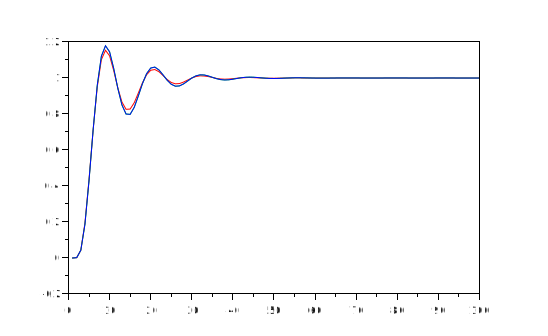

In [18]:
[0 1 2;hh hd1 hd2]
plot(hh, "r")
plot(hd1, "g")
plot(hd2, "b")